In [1]:
# 後ほど図を描画するために使います
# 先に実行しておいて下さい

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.style.use('fivethirtyeight')

# 5. MNIST Data

今回取り組むのは「ニューラルネットワークを使って手書きの数字を認識する」というタスクです．  
具体的には，以下のような手書き数字を正しく認識することを目指します．

![Example of Digits](example_digits.jpg)

人間なら各表記がどの数字を表しているのか簡単に (!?) 理解することができますね．

これらの数字がどのようなデータ表現になっているのか見てみましょう．  
あらかじめダウンロードしておいた `mnist.pkl.gz` をNotebookがあるフォルダに移動して下さい．

データが手元にない方は，以下のリンクをクリックしてダウンロードして下さい：  
 http://deeplearning.net/data/mnist/mnist.pkl.gz

例によってデータを用意する過程については説明しません．  
以下を実行して先に進んで下さい．

In [2]:
# データの読み込み

import gzip
import pickle

f = gzip.open('mnist.pkl.gz', 'rb')
train_set, _, test_set = pickle.load(f, encoding='latin1')

X, y =train_set
X_test, y_test = test_set

上記の処理により，以下の4つのデータが作成されています．

- 正解データ
  - X: 予測に利用するデータ
  - y: 予測したい対象
- テストデータ
  - X_test: 予測に利用するデータ
  - y_test: 予測したい対象．分類結果が正しかったかどうか確認するために用いる
  
まずは学習に必要な正解データの中身を見ていきます．  
X，yのデータの大きさを確認しましょう（どちらも行列です）  

※詰まる方は3つ目のNotebookに戻っておさらいしましょう！

In [3]:
# Xのデータの大きさを確認
X.shape

(50000, 784)

In [4]:
# yのデータの大きさを確認
y.shape

(50000,)

Xとyの上から10行の中身を確認しましょう

In [5]:
# Xの上から10行の中身を確認（列の数が多いので，150~160列を表示）
X[:10, 150:160]

array([[ 0.        ,  0.        ,  0.01171875,  0.0703125 ,  0.0703125 ,
         0.0703125 ,  0.4921875 ,  0.53125   ,  0.68359375,  0.1015625 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.1875    ,
         0.9296875 ,  0.984375  ,  0.984375  ,  0.984375  ,  0.92578125],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.484375  ,  0.98828125],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.05078125,  0.09765625,  0.390625  ,  0.4765625 ,  0.02734375],
       [ 0.        ,  0.125     ,  0.92578125,  0.98828125,  0.984375  ,
         0.27734375,  0.        ,  0.        

In [6]:
# yの10行の中身を確認
y[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])

前回のデータと違って非常に大量のデータです．

まずyについて見てみると，Xのそれぞれのデータが何の数字を表すのか，答えのデータが入っているようです．

問題はXのデータです．1つのデータあたり784列もあり，中には0〜1の間の小数データが格納されています．  
これは何のデータでしょうか？実はこのデータは，数字の画像を 28 x 28 のメッシュ状に分割した際の各マスの濃淡を表しています．

以下の `draw_digit` 関数を利用して784列のデータを28 x 28のデータ形式に戻して，描画してみましょう．  
まず以下を実行して下さい．

In [7]:
def draw_digit(data):
    size = 28
    a, b = np.meshgrid(range(size), range(size))  # 28 x 28のデータに変換
    c = data.reshape(size, size)                               # 濃淡の情報
    c = c[::-1,:]
    
    plt.figure(figsize=(2.5, 2.5))
    plt.xlim(0, 27)
    plt.ylim(0, 27)
    plt.tick_params(labelbottom="off")
    plt.tick_params(labelleft="off")

    plt.pcolor(a, b, c)
    plt.gray()
    
    plt.show()

適当なXを描画して，対応するyを確認します．  
以下を実行して下さい．

/Users/amacbee/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


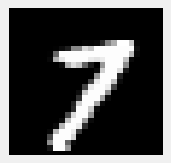

答え: 7


In [8]:
draw_digit(X[40000])
print('答え: {0}'.format(y[40000]))

/Users/amacbee/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


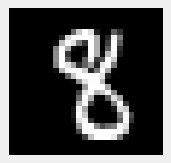

答え: 8


In [9]:
# 適当なXとyのペアを描画してみましょう！

draw_digit(X[49999])
print('答え: {0}'.format(y[49999]))

実際に描画してみると，人の目でなら何の数字が書かれているのか瞬時に判断できます．  
しかし，機械でこの784つの濃淡の情報から数字を判別するなんて可能なのでしょうか？

次のNotebookで，このXとyから分類の規則を学習していきます．